### Abby Bosch
### 12/19/22

#### For this project, I looked at the trending page for Twitter and saw that the word 'Bills' was trending. I had my own suspicions as to why they were trending but I wanted to look into the subject further with some data analysis. 
#### What were peoples general reactions to the Bills? Were people excited about the Football game? Or were people tweeting out of anger that they were winning? Are their more fans or haters tweeting about the game?
#### I answered this question with some senitment analysis using Textblob and NaiveBayesAnalyzer to give me some general statistics on how people were feeling in their tweets. And I also used a wordcloud to show which words were being used the most by those tweeting about the Bills

In [1]:
mapquest_key = 'bzSfTZmQL92smSA2E01oASJAE'

bearer_token = 'AAAAAAAAAAAAAAAAAAAAAE%2BijwEAAAAAvoYAfvFOTAcgaT1qaRtdD%2FBFVGs%3D7FtkfK57kVzsRL4TcJNhjUF6i34dEmtJcuLY3r46xz57UvRXM2'

consumer_key = '9g7ZRoL31dISnGlCNopfEysOq'
consumer_secret = 'zrCf3NHJ0SHEVuP2asFosjAKRGm7HdebkZgTNbtiSRR5k389nG'

In [26]:
import tweepy
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import preprocessor as p
from textblob import TextBlob
import nltk
from nltk.corpus import stopwords
import re
from textblob.sentiments import NaiveBayesAnalyzer

In [3]:
auth = tweepy.OAuthHandler(consumer_key,
                           consumer_secret)

In [4]:
api = tweepy.API(auth, wait_on_rate_limit=True)

In [42]:
tweets = tweepy.Cursor(api.search_tweets, q = 'Bills', lang = 'en').items(250)
text = [tweet.text for tweet in tweets] ## Converts the tweets into text instead of the SearchResult object
text

['for now let us tweet. and not talk about your sayings being a part of your contribution to my stock. \ncoding is dif… https://t.co/GnPGW5fzYa',
 "@finnation @BillsBeast @Matt_Bove Don't worry dude, literally everybody outside WNY see these two as pretty even. I… https://t.co/w76I6bC434",
 'RT @PercyBlakeney63: Energy prices by country. Tell me why people in the U.K. pay way more for their energy bills? https://t.co/MCCeZVW9iN',
 'RT @Matt_Bove: Everything the Bills are trying to accomplish is still in front of them. But we shouldn’t overlook a fourth straight trip to…',
 'RT @Matt_Bove: Everything the Bills are trying to accomplish is still in front of them. But we shouldn’t overlook a fourth straight trip to…',
 'RT @ClaireHammond: Grant Shapps on BBC just now, showing us around his home and giving “handy hints” about how to save money on energy bill…',
 'RT @hsimon62: AFC East after week 10:\nMiami. 7-3\nJets 6-3\nBills 6-3\nPatriots 5-4\n\nAFC East now:\nBills 11-3\nMiami 8-6\nPat

In [6]:
stop_words = stopwords.words('english')

In [7]:
clean_tweets = []
for x in range(0,250):
    cleaning = re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)|[0-9]", ' ',text[x])
    cleaning = cleaning.split()
    cleaning = " ".join(cleaning)
    clean_tweets.append(cleaning)

By using the re package, I removed usernames, unwanted urls, emojis, numbers and special characters
Then with the ntlk package, I removed stopwords from the tweets and then put each tweet in a list for further analysis

In [11]:
clean_tweets

['RT Before the SKOL comeback the Bills held the record for largest comeback in NFL history when they erased a point deficit',
 'It s almost like the Bills roster was viewed as the SB favorite before the season started Didn t r',
 'RT The Bills are headed back to the playoffs',
 'RT M This type of war involves only one winner There will be no compromises or new Minsks in favor of Russian murderers Russ',
 'RT Buffalo HISTORY For the first time in Buffalo history the Bills Sabres and Bandits all won on the same day',
 'RT The Dolphins are clearly better than the Bills Refs in this game were horrible Calling everything on Miami and nothing on',
 'RT The Bills can t win close games crowd awfully quiet these past few weeks',
 'RT I think about that Danny Dyer if you re working hours and you can t cover your bills thats the fault of the slags payin',
 'RT Just simply pointing this out cuz it needs to be The last bills drive got their DPI call So where was this one ear',
 'RT Tyreek Hill run

In [17]:
type(clean_tweets)

list

Now that the tweets are in a form where they can be analyzed, I will use the Textblob to determine the sentiment of each tweet and put them into a dictionary to be analyzed

In [8]:
from textblob import TextBlob

In [18]:
sentiment_dict = {'positive': 0, 'neutral': 0, 'negative': 0}

for x in clean_tweets:
    text = p.clean(x)
    blob = TextBlob(text)
    if blob.sentiment.polarity > 0:
        sentiment = '+'
        sentiment_dict['positive'] += 1 
    elif blob.sentiment.polarity == 0:
        sentiment = ' '
        sentiment_dict['neutral'] += 1 
    else:
        sentiment = '-'
        sentiment_dict['negative'] += 1 

In [19]:
sentiment_dict

{'positive': 94, 'neutral': 107, 'negative': 49}

In [20]:
label = []
amt = []
for x, y in sentiment_dict.items():
    label.append(x)
    amt.append(y)

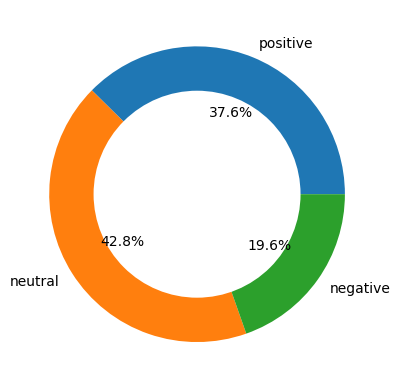

In [21]:
plt.pie(amt, labels = label, autopct='%1.1f%%')
center = plt.Circle((0,0), 0.70, fc = 'white')
figure = plt.gcf()
figure.gca().add_artist(center)

According to the Textblob analyzer, most of these tweets were neutral about the Bills. This may be due to some tweets being from sports update accounts, or other people tweeting out the score for the game and not much else.

In [24]:
clean_tweets

['RT Before the SKOL comeback the Bills held the record for largest comeback in NFL history when they erased a point deficit',
 'It s almost like the Bills roster was viewed as the SB favorite before the season started Didn t r',
 'RT The Bills are headed back to the playoffs',
 'RT M This type of war involves only one winner There will be no compromises or new Minsks in favor of Russian murderers Russ',
 'RT Buffalo HISTORY For the first time in Buffalo history the Bills Sabres and Bandits all won on the same day',
 'RT The Dolphins are clearly better than the Bills Refs in this game were horrible Calling everything on Miami and nothing on',
 'RT The Bills can t win close games crowd awfully quiet these past few weeks',
 'RT I think about that Danny Dyer if you re working hours and you can t cover your bills thats the fault of the slags payin',
 'RT Just simply pointing this out cuz it needs to be The last bills drive got their DPI call So where was this one ear',
 'RT Tyreek Hill run

In this next section, I will be repeating what was done in the section above, but I will be using NaiveBayesAnalyzer instead of the textblob analyzer

In [33]:
sentiment_dict2 = {'positive': 0, 'negative': 0}

for x in clean_tweets:
    text2 = p.clean(x)
    blob2 = TextBlob(text2, analyzer = NaiveBayesAnalyzer())
    print(blob2.sentiment)
    if blob2.sentiment.classification == 'pos':
        sentiment_dict2['positive'] += 1 
    else:
        sentiment_dict2['negative'] += 1 

Sentiment(classification='pos', p_pos=0.8028203007117403, p_neg=0.19717969928826057)
Sentiment(classification='pos', p_pos=0.7094061155836362, p_neg=0.290593884416364)
Sentiment(classification='neg', p_pos=0.27170820729361733, p_neg=0.7282917927063836)
Sentiment(classification='pos', p_pos=0.9123409407518344, p_neg=0.08765905924816399)
Sentiment(classification='pos', p_pos=0.9855628624171124, p_neg=0.014437137582889378)
Sentiment(classification='neg', p_pos=0.20238640953579287, p_neg=0.7976135904642047)
Sentiment(classification='pos', p_pos=0.9100973411310082, p_neg=0.08990265886899228)
Sentiment(classification='pos', p_pos=0.794648037136907, p_neg=0.20535196286309434)
Sentiment(classification='neg', p_pos=0.26948534420080383, p_neg=0.7305146557991974)
Sentiment(classification='neg', p_pos=0.32219311469176026, p_neg=0.6778068853082403)
Sentiment(classification='neg', p_pos=0.2251997866342258, p_neg=0.7748002133657756)
Sentiment(classification='pos', p_pos=0.9123409407518344, p_neg=0.08

Sentiment(classification='neg', p_pos=0.3599218682387314, p_neg=0.6400781317612669)
Sentiment(classification='pos', p_pos=0.5615086083755083, p_neg=0.438491391624492)
Sentiment(classification='pos', p_pos=0.7559059639042623, p_neg=0.24409403609573996)
Sentiment(classification='pos', p_pos=0.8106679326905596, p_neg=0.18933206730944105)
Sentiment(classification='neg', p_pos=0.26513154905682196, p_neg=0.7348684509431787)
Sentiment(classification='neg', p_pos=0.037120279219778514, p_neg=0.962879720780222)
Sentiment(classification='pos', p_pos=0.7560744320172408, p_neg=0.24392556798275966)
Sentiment(classification='pos', p_pos=0.9695412638759646, p_neg=0.030458736124036028)
Sentiment(classification='pos', p_pos=0.7194859772371317, p_neg=0.2805140227628672)
Sentiment(classification='neg', p_pos=0.12745212834732786, p_neg=0.8725478716526677)
Sentiment(classification='pos', p_pos=0.7033644472466667, p_neg=0.2966355527533331)
Sentiment(classification='pos', p_pos=0.8496435536137334, p_neg=0.150

Sentiment(classification='pos', p_pos=0.5251006672291699, p_neg=0.4748993327708319)
Sentiment(classification='neg', p_pos=0.41668375848221617, p_neg=0.5833162415177834)
Sentiment(classification='pos', p_pos=0.545008883596212, p_neg=0.45499111640378553)
Sentiment(classification='neg', p_pos=0.0650853426339107, p_neg=0.9349146573660921)
Sentiment(classification='pos', p_pos=0.9599456245890917, p_neg=0.04005437541090947)
Sentiment(classification='pos', p_pos=0.724317041448577, p_neg=0.2756829585514227)
Sentiment(classification='pos', p_pos=0.9123409407518344, p_neg=0.08765905924816399)
Sentiment(classification='pos', p_pos=0.6419853562761145, p_neg=0.35801464372388464)
Sentiment(classification='pos', p_pos=0.7013708690401949, p_neg=0.2986291309598054)
Sentiment(classification='neg', p_pos=0.06352300618308099, p_neg=0.9364769938169194)
Sentiment(classification='neg', p_pos=0.30994792588775805, p_neg=0.6900520741122443)
Sentiment(classification='pos', p_pos=0.8496435536137334, p_neg=0.15035

In [34]:
sentiment_dict2

{'positive': 187, 'negative': 63}

In [35]:
label2 = []
amt2 = []
for x, y in sentiment_dict2.items():
    label2.append(x)
    amt2.append(y)

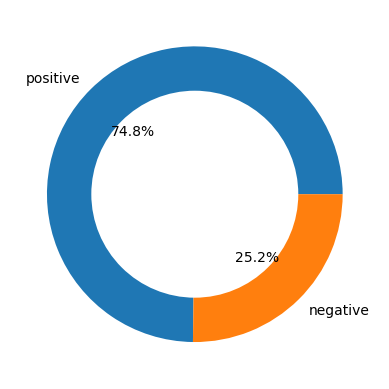

In [36]:
plt.pie(amt2, labels = label2, autopct='%1.1f%%')
center = plt.Circle((0,0), 0.70, fc = 'white')
figure = plt.gcf()
figure.gca().add_artist(center)

It appears that the NaiveBayesAnalyzer found the tweet to be much more positive than the Textblob analyzer. I suspect that some of the tweets that were deemed 'neutral' by the textblob analyzer were split between positive and negative for the NaiveBayesAnalyzer. Many more leaned positive than negative in that case, however.

In [38]:
string_tweets = " ".join(clean_tweets)

In [39]:
type(string_tweets)

str

In order to create the word cloud, I joined all of the tweets together to be one large string so that the words could be properly counted up and displayed

In [40]:
wordcloud = WordCloud(background_color = 'white', max_words = 20).generate(string_tweets)

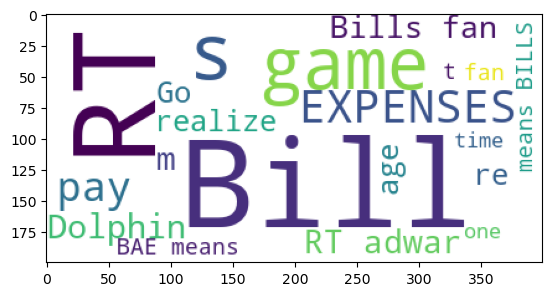

In [41]:
plt.imshow(wordcloud)

In this wordcloud we can observe that most people were talking about the Bills, but we can also infer that they were playing against the dolphins due to their placement in the cloud. We can also see that many people are fans of the team. There may have been some contamination from people tweeting about paying their bills, which is why expenses appears on the word cloud. But most of it seems to be related to the football team

Overall we can observe that the general response to the Bills game was a positive one. Though there were a lot of neutral tweets, there were still more positive than negative. And when the neutral tweets had to be divided into positives and negatives, there were more positives tweets by a longshot. We can also observe that there were many fans of the game due to how many mentions there were of them within the word cloud. So from all of this information we can conclude that the Bills likely won the football game last night, and the support from fans was immense. There were more fans tweeting about the game positively than there were negitively. 